### Decision tree Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [3]:
df = pd.DataFrame(california_df.data,columns=(california_df.feature_names))

In [4]:
df['target'] = california_df.target

In [5]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [6]:
df.shape

(5160, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 6059 to 7268
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      5160 non-null   float64
 1   HouseAge    5160 non-null   float64
 2   AveRooms    5160 non-null   float64
 3   AveBedrms   5160 non-null   float64
 4   Population  5160 non-null   float64
 5   AveOccup    5160 non-null   float64
 6   Latitude    5160 non-null   float64
 7   Longitude   5160 non-null   float64
 8   target      5160 non-null   float64
dtypes: float64(9)
memory usage: 403.1 KB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,3.799151,28.684690,5.427384,1.104026,1422.535078,2.943448,35.615279,-119.544227,2.023867
std,1.872582,12.628514,2.869401,0.608588,1184.596839,0.896042,2.137721,1.999687,1.124109
min,0.499900,1.000000,1.130435,0.444444,3.000000,0.750000,32.540000,-124.350000,0.225000
25%,2.524875,18.000000,4.413674,1.005944,787.750000,2.427888,33.930000,-121.750000,1.181000
50%,3.472200,29.000000,5.188738,1.049537,1173.000000,2.834498,34.230000,-118.480000,1.755000
75%,4.665425,37.000000,6.012973,1.100649,1718.000000,3.281489,37.720000,-117.990000,2.573250
max,15.000100,52.000000,132.533333,34.066667,35682.000000,18.821818,41.920000,-114.490000,5.000010


array([[<AxesSubplot: title={'center': 'MedInc'}>,
        <AxesSubplot: title={'center': 'HouseAge'}>,
        <AxesSubplot: title={'center': 'AveRooms'}>],
       [<AxesSubplot: title={'center': 'AveBedrms'}>,
        <AxesSubplot: title={'center': 'Population'}>,
        <AxesSubplot: title={'center': 'AveOccup'}>],
       [<AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'target'}>]], dtype=object)

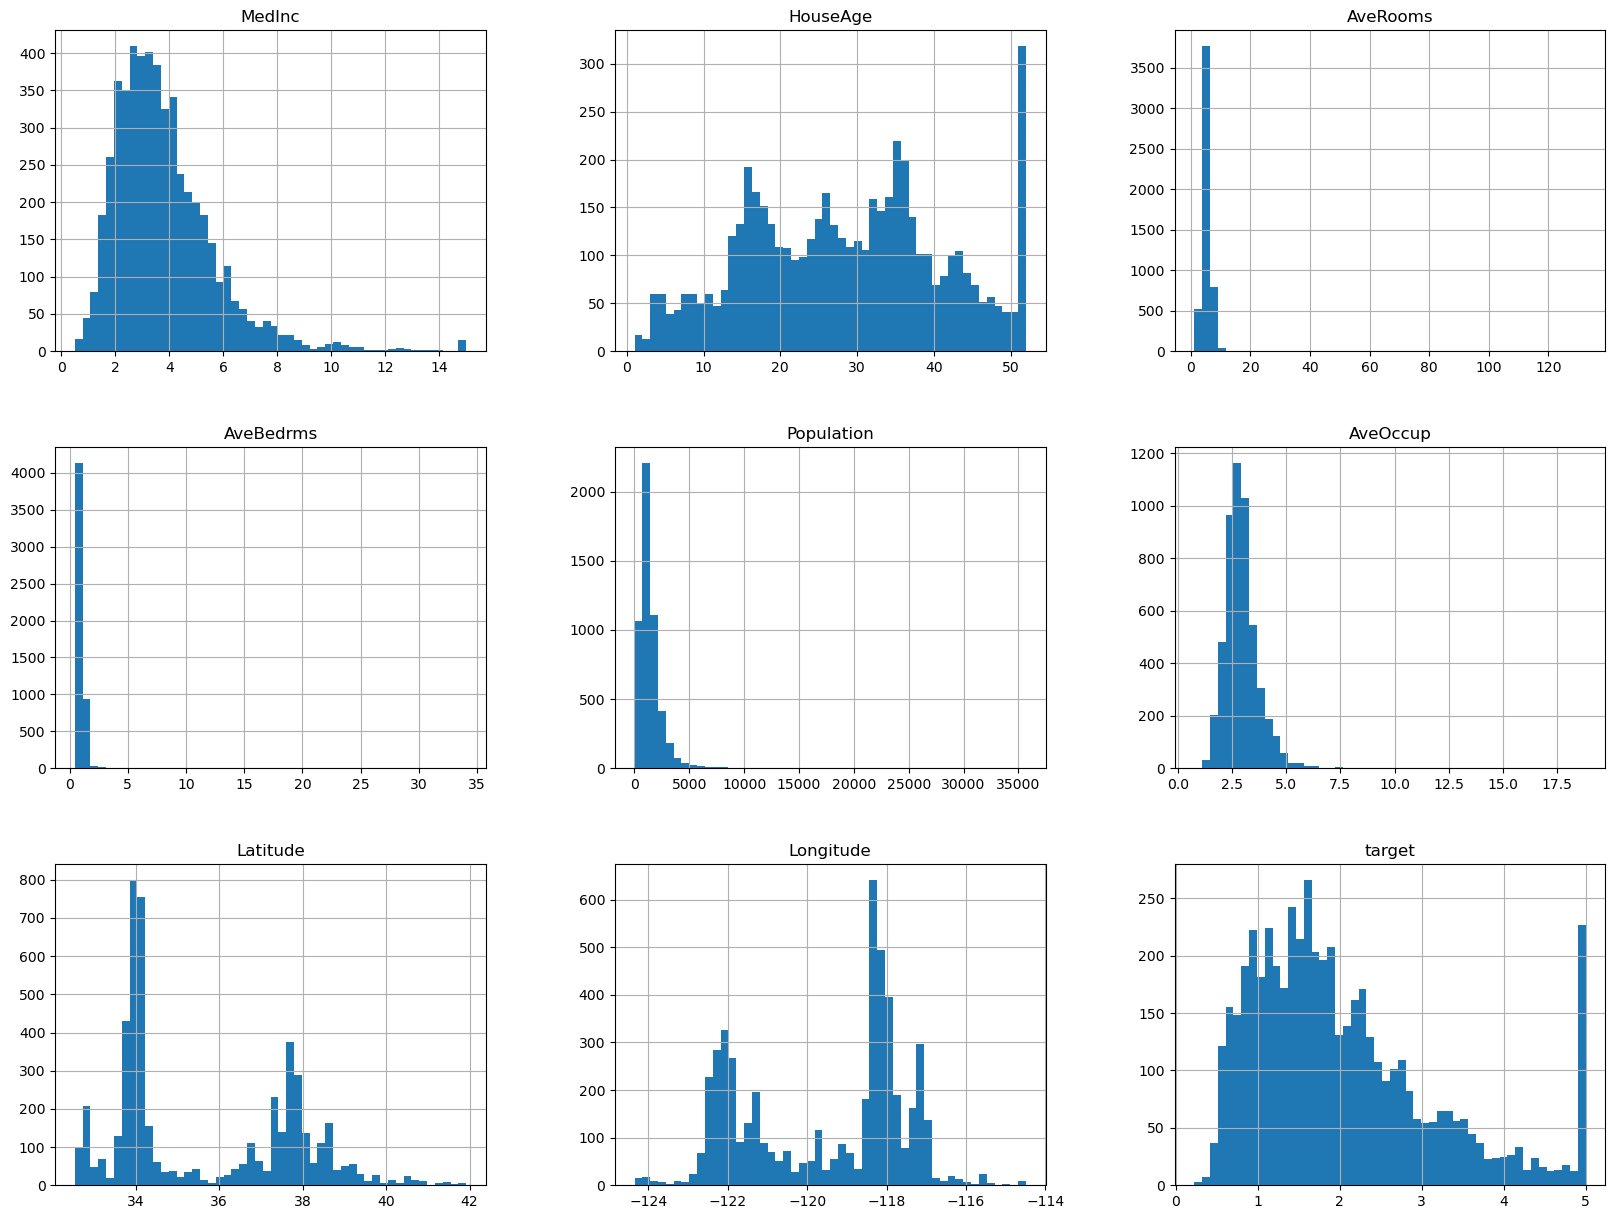

In [40]:
df.hist(figsize=(20,15), bins=50)

<AxesSubplot: >

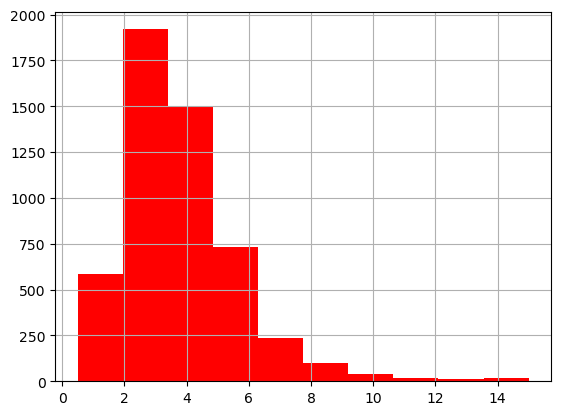

In [44]:
# Visualisation on Histogram of Median Income
df["MedInc"].hist(color='r')

In [41]:
# Independent And Dependent Variables
X = df.iloc[:,:-1]
y = df['target']

In [42]:
X.shape, y.shape

((5160, 8), (5160,))

<AxesSubplot: >

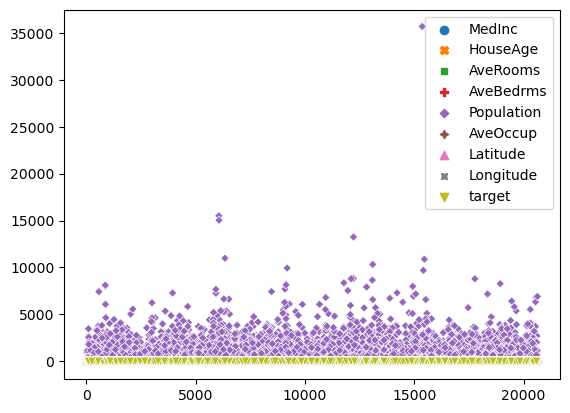

In [20]:
sns.scatterplot(df)

In [23]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train.shape, X_test.shape

((3457, 8), (1703, 8))

In [25]:
y_train.shape, y_test.shape

((3457,), (1703,))

In [26]:
# Model Building
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [27]:
regressor

DecisionTreeRegressor()

In [28]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = regressor.predict(X_test)

[Text(0.5, 0.9166666666666666, 'x[0] <= 4.934\nsquared_error = 1.247\nsamples = 3457\nvalue = 2.026'),
 Text(0.25, 0.75, 'x[0] <= 3.323\nsquared_error = 0.771\nsamples = 2710\nvalue = 1.703'),
 Text(0.125, 0.5833333333333334, 'x[2] <= 4.375\nsquared_error = 0.601\nsamples = 1615\nvalue = 1.438'),
 Text(0.0625, 0.4166666666666667, 'x[5] <= 2.449\nsquared_error = 0.758\nsamples = 708\nvalue = 1.708'),
 Text(0.03125, 0.25, 'x[6] <= 37.905\nsquared_error = 1.155\nsamples = 222\nvalue = 2.166'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'x[0] <= 1.721\nsquared_error = 0.438\nsamples = 486\nvalue = 1.499'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= 2.463\nsquared_error = 0.377\nsamples = 907\nvalue = 1.227'),
 Text(0.15625, 0.25, 'x[4] <= 24.5\nsquared_error = 0.229\nsamples = 409\nvalue = 0.983

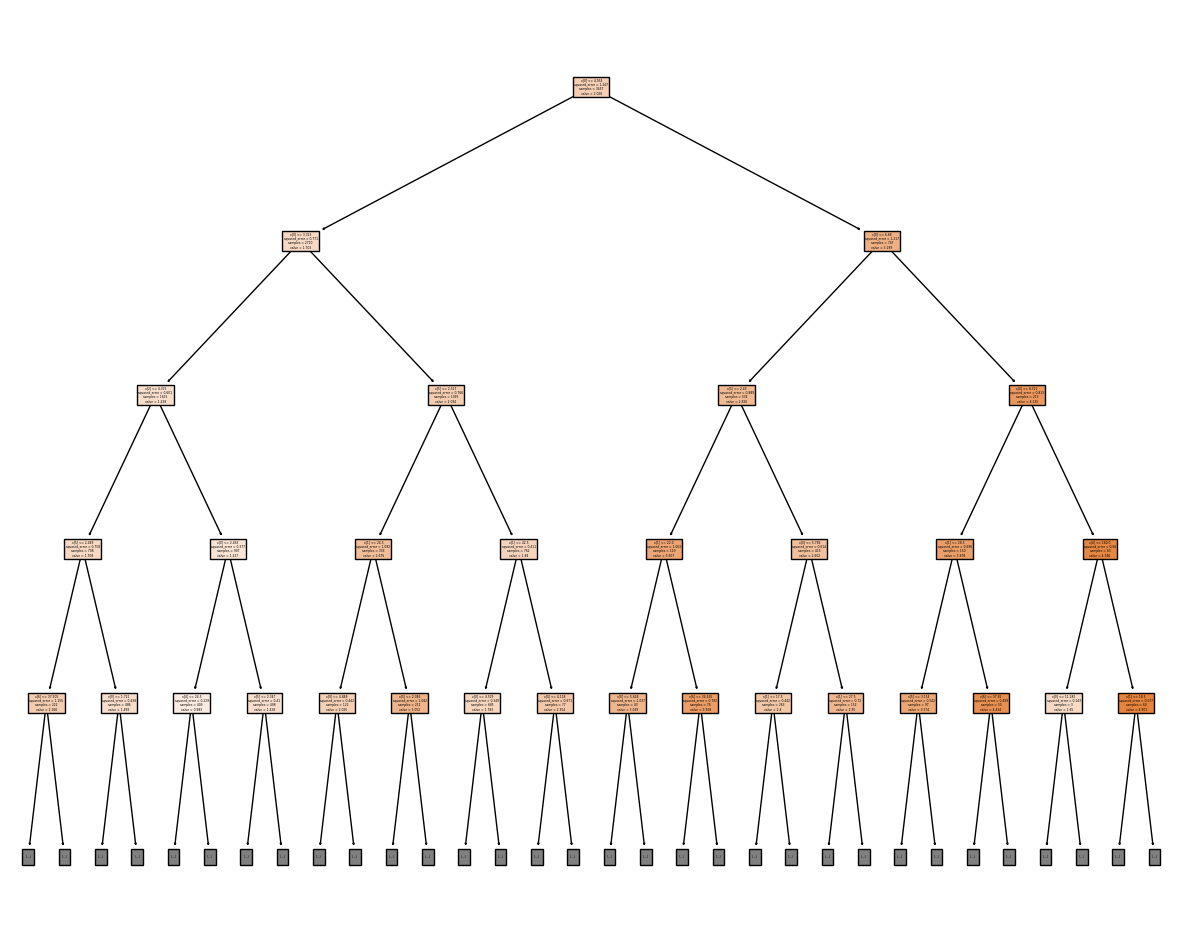

In [56]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(regressor, filled=True, max_depth=4)

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
score

0.48141543339448467

In [58]:
# Hyperparameter Tuning

parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto', 'sqrt', 'log2']
}

In [59]:
regressor = DecisionTreeRegressor()

In [60]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
regressor = GridSearchCV(regressor, param_grid=parameter, cv=2, scoring='neg_mean_squared_error')

In [62]:
regressor.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [63]:
regressor.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'random'}

In [64]:
r2_score(y_pred, y_test)

0.48141543339448467